# Creating D1

D1 consists of two primary clusters. The first cluster, labeled as 0, is centered around the point (2, 2.2) and contains a total of 80 points. The second cluster, labeled as 1, is centered around the point (-1, 1.8). Cluster 1 has fewer points compared to cluster 0. The plot below illustrates the distribution of the two clusters.

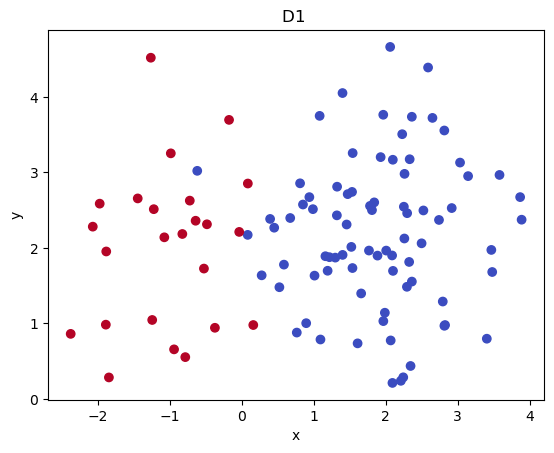

In [192]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate 50 points for class 0
X0 = np.random.randn(80, 2) + np.array([2, 2.2])
y0 = np.zeros(80)

# Generate 50 points for class 1
X1 = np.random.randn(24, 2) + np.array([-1, 1.8])
y1 = np.ones(24)


# Combine the datasets
X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title("D1 ")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

df = pd.DataFrame(np.column_stack((X, y)), columns=['Feature1', 'Feature2', 'Label'])

# Export the DataFrame to a CSV file
df.to_csv('data.csv', index=False)

# Training SVM 

C = 0.01, LOO-CV Accuracy: 0.88


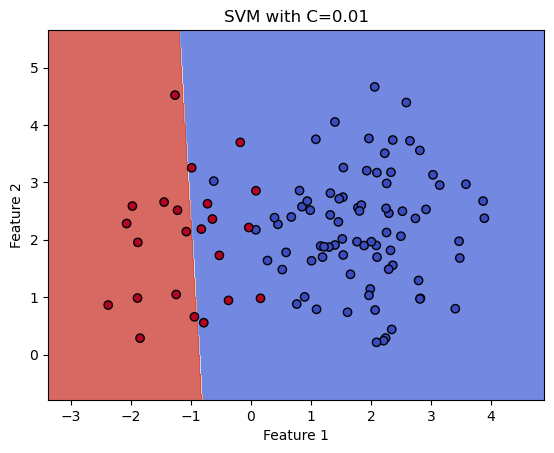

C = 0.1, LOO-CV Accuracy: 0.92


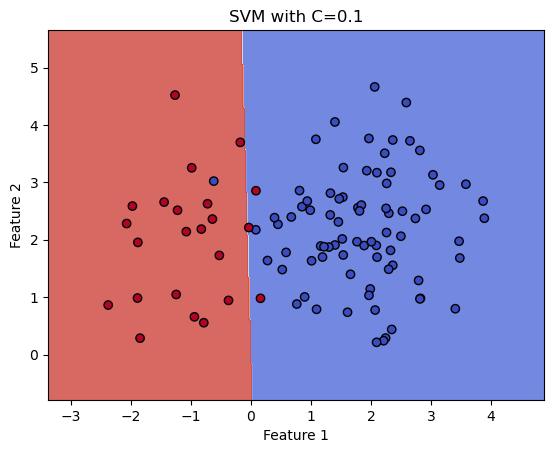

C = 1, LOO-CV Accuracy: 0.93


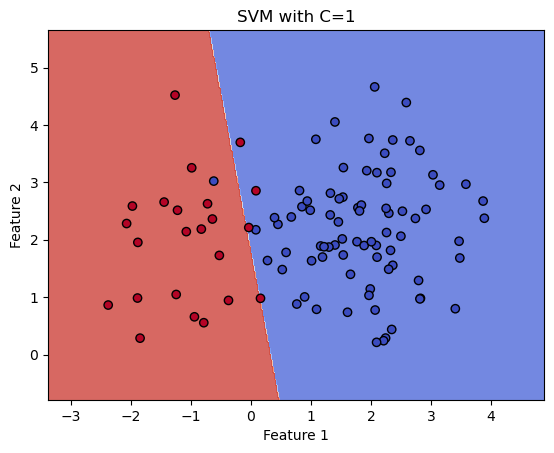

C = 10, LOO-CV Accuracy: 0.94


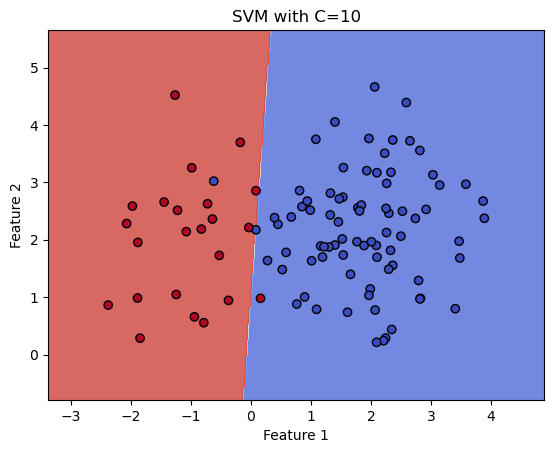

In [186]:


loo = LeaveOneOut()

y_true = []
y_pred = []

def plot_decision_boundary(clf, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Train SVM with different values of C
C_values = [0.01, 0.1, 1, 10]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
for C in C_values:
    clf = SVC(kernel='linear', C=C, probability=True)
    clf.fit(X_train, y_train)
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train the model
        clf.fit(X_train, y_train)

        # Predict the test instance
        y_pred.append(clf.predict(X_test)[0])
        y_true.append(y_test[0])
    
    accuracy = accuracy_score(y_true, y_pred)
    # print("C = " +  C  +  f"LOO-CV Accuracy: {accuracy:.2f}")
    print(f"C = {C}, LOO-CV Accuracy: {accuracy:.2f}")
    plot_decision_boundary(clf, X_train, y_train, f"SVM with C={C}")

C manages the trade-off between attaining a low training error and a low testing error, which is effectively a choice between bias and variance.Higher C decreases training error but increases the danger of overfitting, resulting in decreased accuracy on the test data set. Selecting a balanced C is critical for SVMs.


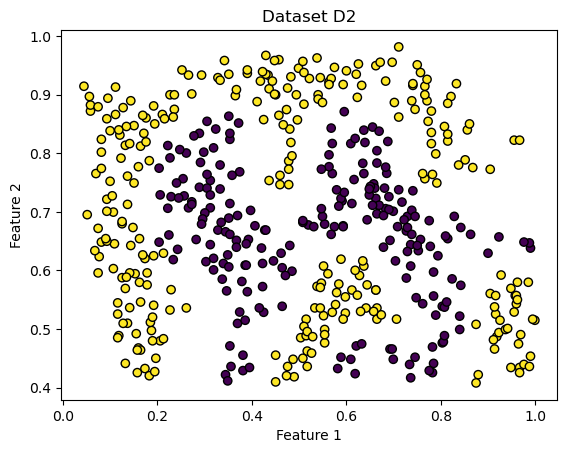

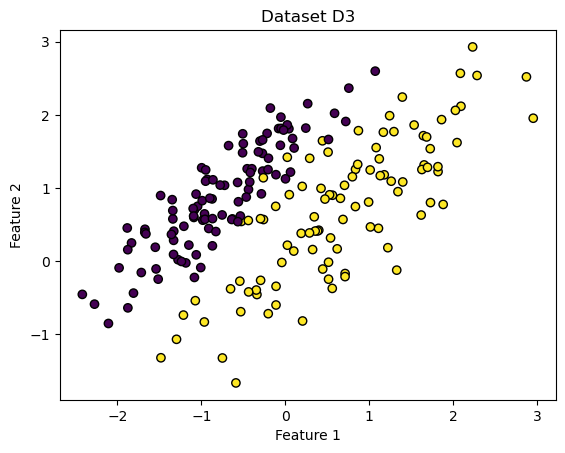

In [187]:
d2 = pd.read_csv("D2.csv")
d3 = pd.read_csv("D3.csv")

def plot_data(data, title):
    x = data.iloc[:, 0]
    y = data.iloc[:, 1]
    label = data.iloc[:,2]
    plt.scatter(x, y,c= label, edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot the datasets
plot_data(d2, "Dataset D2")
plot_data(d3, "Dataset D3")

The plots suggest that D2 presents a non-linear separation pattern, indicating that a linear SVM might perform poorly due to its inability to capture complex boundaries. Conversely, D3 exhibits some characteristics of linear separability, hinting that a linear SVM could yield relatively better performance. However, the mixed scatter of points in D3 might still pose challenges for a linear SVM. In summary, while linear SVMs might struggle with D2, they may demonstrate relatively good performance on D3, albeit with potential limitations.

Linear SVM prediction 0.56


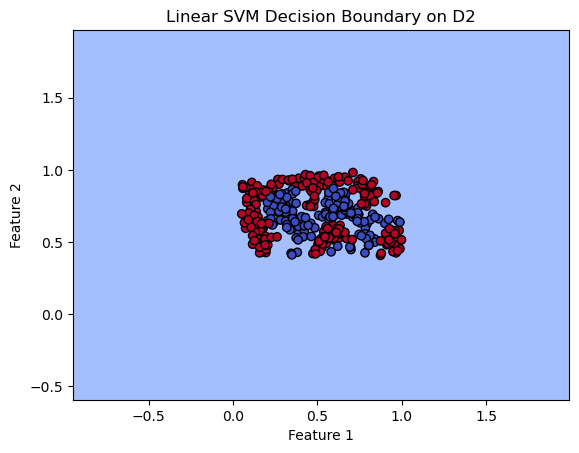

In [188]:

X = d2.iloc[:, :-1].values
y = d2.iloc[:, -1].values
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.3)

clf = SVC(kernel='linear', probability=True)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
scores = accuracy_score(y_pred, y_test)
print(f"Linear SVM prediction {scores}")

plot_decision_boundary(clf, X_train, y_train, "Linear SVM Decision Boundary on D2")

As I expected before, the linear SVM did not have a good performance, it only have accuracy around 0.5 on D2 which manes sense, becauze it can't find the line to separte two cluster, hence it labels all points as one of cluster therefore we only have half of are labeled correctly. in order to improve the SVM prediction we might need to use Radial Basis Function (RBF) Kernel or Polynomial Kernel, those function aim to deal situation like this (non-linear realtionships). 

In order to find the best performance model to deal with this data, I'll using grid search CV to help me find out the best one, give following parameters: 

    - linear kernel with different C(0.01,1, 10, 50):
       - The parameter 𝐶 dictates the trade-off between maximizing the margin and minimizing classification errors. Optimal C values typically fall within a moderate range, striking a balance between model complexity and generalization.
    - RBF kernel with different C ( 0.001, 10, 50) and  gamma : (0.01. 1,5) :
        -  Similar to the linear kernel, 𝐶 governs the margin-tradeoff, favoring intermediate values to avoid under or overfitting.
        - The parameter gamma regulates the influence of each training example. Small gamma  values imply a broader influence, whereas larger gamme  values localize it. This range of gamma values helps capture varying degrees of locality in the dataset.
    - Poly kernel with differenct C  0.001, 10, 50;  gamma ( 0.01. 1,5):
        - Analogous to previous kernels, C should reside within a moderate range to balance margin maximization and classification error minimization.
        - gamma influences the extent of each training example's impact, with smaller values denoting broader influence and larger values indicating localized effects. By exploring multiple gamma values, we account for different degrees of locality in the dataset.



Best Parameters: {'C': 50, 'gamma': 5, 'kernel': 'rbf'}
Best C :  50 
Best Cross-Validation Accuracy: 0.92


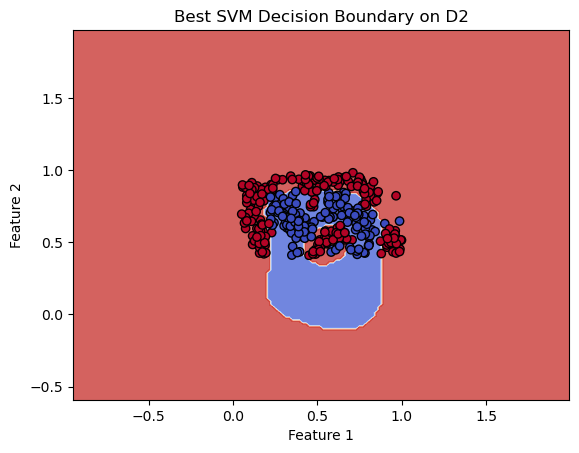

In [189]:
X = d2.iloc[:, :-1].values
y = d2.iloc[:, -1].values


X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.3)


param_grid = [
    {'kernel': ['linear'], 'C': [0.01, 1, 10, 50]},
    {'kernel': ['rbf'], 'C': [0.01, 1, 10, 50], 'gamma': [0.01, 1, 5]},
    {'kernel': ['poly'], 'C': [0.01, 1, 10, 50],  'gamma': [0.01, 1, 5]}
]

model = SVC()

grid_search = GridSearchCV(model, param_grid, cv=loo, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_C = best_params["C"]
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best C :  {best_C} ")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")


plot_decision_boundary(grid_search.best_estimator_, X_train, y_train, "Best SVM Decision Boundary on D2")


The results are consistent with predictions, since the RBF kernel, a nonlinear SVM technique, is the best-performing kernel for D2. This finding emphasizes the need of using nonlinear techniques to adequately capture the dataset's complicated connections. Furthermore, the significant gain in accuracy from around 0.5 to around 0.9 demonstrates the RBF kernel's ability to correctly categorize the bulk of data points in D2. This emphasizes the necessity of selecting kernel functions that are customized to the dataset's properties, resulting in improved prediction performance.

Linear SVM prediction 0.95


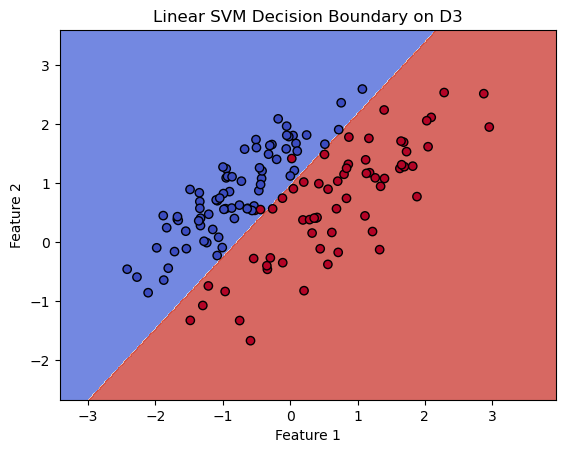

In [193]:

X = d3.iloc[:, :-1].values
y = d3.iloc[:, -1].values
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.3)

clf = SVC(kernel='linear',  probability=True)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
scores = accuracy_score(y_pred, y_test)
print(f"Linear SVM prediction {scores}")

plot_decision_boundary(clf, X_train, y_train, "Linear SVM Decision Boundary on D3")

D3's linear nature results in good linear SVM performance (accuracy: 0.95), making the RBF kernel less useful. Fine-tuning the C parameter or studying the polynomial kernel may improve efficiency by optimizing the decision boundary.

In this scenario, I'm experimenting with the polynomial kernel by changing its degree parameter. This enables the SVM model to adapt to various levels of complexity in the decision boundary, allowing us to better understand the effect of polynomial degree on performance, notably on dataset D3.

In addition, I'm modifying the coef0 parameter to add curvature to the decision boundary, allowing the model to better capture non-linear correlations in the data. By experimenting with different combinations of degree and coef0 values, I want to optimize the shape of the decision boundary and increase the model's performance on D3.

Best Parameters: {'C': 50, 'coef0': 0, 'degree': 3, 'kernel': 'poly'}
Best Cross-Validation Accuracy: 0.97


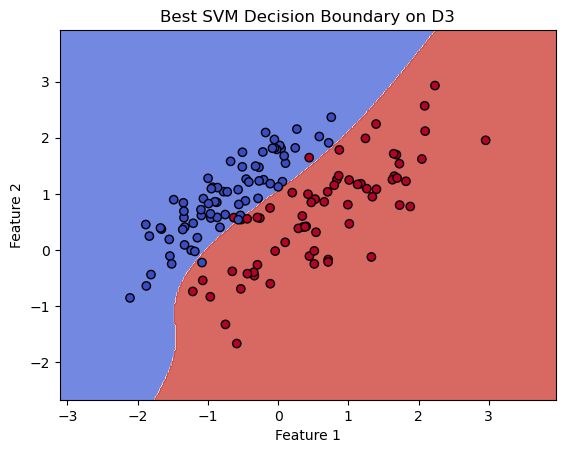

In [195]:
X = d3.iloc[:, :-1].values
y = d3.iloc[:, -1].values


X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.3)


param_grid = [
    {'kernel': ['linear'], 'C': [0.01, 10, 50]},
    {'kernel': ['rbf'], 'C': [0.01, 10, 50], 'gamma': [0.01, 1, 5]},
    {'kernel': ['poly'], 'C': [0.01, 10, 50], 'degree': [2, 3, 4], 'coef0': [0, 1]}
]

model = SVC()

grid_search = GridSearchCV(model, param_grid, cv=loo, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")
plot_decision_boundary(grid_search.best_estimator_, X_train, y_train, "Best SVM Decision Boundary on D3")

The results confirm the efficacy of the polynomial kernel in achieving the best predictive performance, with an impressive accuracy of 0.97. By setting the parameters C=10, coef0=1, and degree=4, the SVM model was able to accurately classify the data points in D3.

